Homework 2: n-gram LM
----

Due date: January 30th, 2025

Points: 100

Goals:
- think about the ethics of language models
- understand the difficulties of counting and probablities in NLP applications
- work with real world data to build a functioning language model
- stress test your model (to some extent)

Complete in groups of: __one (individually)__

Files to submit (3):
- `lm_model.py` (65 points)
- `ngram_lm.ipynb` (30 points)
    - the training file that you used for the last part of Task 3
- note that the remaining 5 points are assigned to overall style and legibility (see note at end of notebook)

Allowed python modules:
- `numpy`, `matplotlib`, and all built-in python libraries (e.g. `math` and `string`)
- do not use `nltk` or `pandas`


**First get the language model(lm_starter.py) implemented and pass all the unit tests. Run the unit tests from the command line.**
--
Instructions:
- Complete outlined problems in this notebook.
- When you have finished, __clear the kernel__ and __run__ your notebook "fresh" from top to bottom. Ensure that there are __no errors__. 
    - If a problem asks for you to write code that does result in an error (as in, the answer to the problem is an error), leave the code in your notebook but commented out so that running from top to bottom does not result in any errors.
- Double check that you have completed Task 0.
- Submit your work on Gradescope.
- Double check that your submission on Gradescope looks like you believe it should.

**IMPORTANT: If you edit the lm_model.py file, restart the kernel after each edit. Otherwise you won't see the changes in the notebook.**


Task 0: Name, References, Reflection (5 points)
---

Name: Kate Lanman

References
---
List the resources you consulted to complete this homework here. Write one sentence per resource about what it provided to you. If you consulted no references to complete your assignment, write a brief sentence stating that this is the case and why it was the case for you.

- https://web.stanford.edu/~jurafsky/icslp-red.pdf
    - Read about the Berkeley Restaurant Project.
- https://www.gutenberg.org/ebooks/11
    - data for last task
- https://stackoverflow.com/questions/39773377/python-multiprocessing-check-status-of-each-processes
    - Timing out function after x seconds

AI Collaboration
---
Following the *AI Collaboration Policy* in the syllabus, please cite any LLMs that you used here and briefly describe what you used them for. Additionally, provide comments in-line identifying the specific sections that you used LLMs on, if you used them towards the generation of any of your answers.

Do not include nested list comprehensions supplied by AI collaborators — all nested list comprehensions __must__ be re-written.

Reflection
----
Answer the following questions __after__ you complete this assignment (no more than 1 sentence per question required, this section is graded on completion):

1. Does this work reflect your best effort?

    Yes, I think this work reflects my best effort.
2. What was/were the most challenging part(s) of the assignment?

    The hardest part of the assignment was determining the best way to train the model and what attributes needed to be stored when training.
3. If you want feedback, what function(s) or problem(s) would you like feedback on and why?

    I don't need feedback.

Task 1: Language Model Ethics (10 points)
---

Read the abstract (first two pages) of <u>[Ethical and social risks of harm from
Language Models](https://arxiv.org/pdf/2112.04359)</u>.  
It's very long, but you are encouraged to look at the table of contents and skim through any sections that interest you. 

The authors list six categories of risks that could arise from language models.  
Pick **one** of the six categories, and answer the following questions.
Questions 2 - 5 should be answered in 2-3 sentences each.  
None of these questions have a single correct answer.

1. Which category did you pick?

   "Discrimination, Exclusion, and Toxicity"
3. What does this category mean?

   Systemic biases are baked into the data that we train our models on which can cause LM's to reinforce these biases and perpetuate discrimination. Language models can reproduce discrimination or toxicity that exists in the training data or poorly represent groups which are underrepresented in the training data (often marginalised, minority groups).
5. Provide an example of how the behavior of a language model could cause this type of harm. You may use an example from the paper, from your own experiences, or elsewhere. If draw on any outside resources, please cite them.

   From the paper: One study found GPT-3 predictions exhibited Islamophic rhetoric, mapping "Muslim" to "terrorist" in nearly a quarter of test cases. Such sentiment only serves to perpetuate false negative stereotypes.
7. Imagine that we have created a cutting-edge language model. How might we test it for risky behavior?

   Since this issue is so broad and can appear in so many different forms, the context of the model and its uses are important in informing how it might be tested. Generally, I would determine what harms are most likely given the use of the model as well as the data it was trained on and run repeated analyses under different conditions to determine if/when harmful behaviors are produced. 
9. Can you think of a potential solution to the issue you highlighted in #3? What kinds of compromises would you need to make?

   Unfortunately, I'm unsure if it's possible to completely eradicate the possibility that toxic, discriminatory, or bias sentiments are generated by LM's since these issues are so deeply engrained in our social systems. The best solution would be to thoroughly vet all training documents to ensure the training data is not overtly harmful and that these harms won't be replicated by the model (important to consider this in the context of the use of the model, too). This would require compromising the amount of data available to train on and would draw out the process of selecting training data.

Task 2: Berp Data Write-Up (5 points)
---

Every time you use a data set in an NLP application (or in any software application), you should be able to answer a set of questions about that data. Answer these now. Default to no more than 1 sentence per question needed. If more explanation is necessary, do give it.

This is about the __berp__ data set. Feel free to write code/add cells to help answer these questions.

1. (Answer provided for you) Where did you get the data from? https://www1.icsi.berkeley.edu/Speech/berp.html or https://github.com/wooters/berp-trans 
2. How was the data collected (where did the people acquiring the data get it from and how)? 

    The data was collected in an office environment using a "Wizard of Oz system" where participants interacted with a display that was controlled and monitored by researchers in a separate room. 
3. How large is the dataset? (# lines, # tokens) 

    6756 lines, 243467 tokens


In [1]:
from lm_model import read_file, tokenize_line

data = read_file('training_files/berp-training.txt')
print(f'number of lines: {len(data)}')

# tokenize
tokens = []
for line in data:
    tokens += tokenize_line(line, 1)

print(f'number of tokens: {len(tokens)}')

number of lines: 6756
number of tokens: 243467


4. What is your data? (i.e. newswire, tweets, books, blogs, etc) 
    
    Transcripts of audio files related to restaurants in the Berkeley area.
5. Who produced the data? (who were the authors of the text? Your answer might be a specific person or a particular group of people) 

    The International Computer Science Institute at the University of California at Berkeley

Task 3: Implement an n-gram Language Model (65 points)
----

Implement the `LanguageModel` class as outlined in the provided `lm_starter.py` file. Do not change function signatures (the unit tests that we provide and the unit tests in the autograder will break if you do).

Your language model:
- *must* work for both the unigram and bigram cases (5 points are allocated to an experiment involving larger values of `n`, so if your model does not work for larger values of `n`, you won't receive these points, but you will receive a majority of the assignment points.)
    - hint: try to implement the bigram case as a generalized "`n` is greater than 1" case
- should be *token agnostic* (this means that if we give the model text tokenized as single characters, it will function as a character language model and if we give the model text tokenized as "words" (or "traditionally"), then it will function as a language model with those tokens)
- uses Laplace smoothing
- replaces all tokens that occur only once with `<UNK>` at train time
    - note: do not add `<UNK>` to your vocabulary if no tokens in the training data occur only once!

We have provided:
- a function to read in files
- some functions to change a list of strings into tokens (that you can run to tokenize by "word" or by character)
- the skeleton of the `LanguageModel` class

You need to implement:
- all functions marked in `lm_starter.py`

You may implement:
- additional functions/methods as helpful to you

As a guideline, including comments, all code required and some debugging code that can be run with `verbose` parameters, our solution is ~285 lines. (~+105 lines versus the starter code).

Points breakdown marked in code below.

In [2]:
import lm_model as lm
import numpy as np
import matplotlib.pyplot as plt

test the language model (unit tests)
-----

Do this __*from the command line*__

Passing all provided unit tests is a good indication that your model is correct. They are *not a guarantee*, so make sure to look at the tests and the cases that they cover. (we'll be testing your model against all of the testing data in addition).

The autograder points in gradescope are assigned __60 points__ there are __an additional 10 points__ manually graded for the correctness of your sentence generation.

To run tests: make sure all training files are in a `training_files` directory that is in the same directory as this notebook.

Instructions for Running Unit Tests from the command line:
- To run the unit tests, navigate to the directory where your code files are located and execute the following command:
`python -m unittest test_file_name`
    - Ensure that your Python environment has access to the necessary dependencies and that all modules are properly imported.
    - come to office hours/post on the course discussion board with any installation issues

In [3]:
# 5 points

# instantiate a unigram language model, train it, and generate ten sentences
# make sure your output is nicely formatted!
ngram = 1
training_file_path = "training_files/berp-training.txt"

# optional parameter tells the tokenize function how to tokenize
by_char = False
data = lm.read_file(training_file_path)
tokens = lm.tokenize(data, ngram, by_char=by_char)

# initialize model and train
berp_unigram = lm.LanguageModel(ngram)
berp_unigram.train(tokens, verbose=False) 

# generate 10 sentences
sentences = berp_unigram.generate(10)
for sentence in sentences:
    print(' '.join(sentence))

<s> </s>
<s> so to me like i a miles be know i'd five </s>
<s> don't </s>
<s> information </s>
<s> five i only the stop about of tour tell list i dollars </s>
<s> i </s>
<s> telegraph list <UNK> like breakfast any restaurants me let's i'd place thai all </s>
<s> </s>
<s> any with go vin i an thai to away about <UNK> dinner with far i twenty today very some list this i </s>
<s> okay and </s>


In [4]:
# instantiate a bigram language model, train it, and generate ten sentences
# make sure your output is nicely formatted!
ngram = 2
training_file_path = "training_files/berp-training.txt"
# optional parameter tells the tokenize function how to tokenize
by_char = False
data = lm.read_file(training_file_path)
tokens = lm.tokenize(data, ngram, by_char=by_char)

# initialize model and train
berp_bigram = lm.LanguageModel(ngram)
berp_bigram.train(tokens, verbose=False) 

# generate 10 sentences
sentences = berp_bigram.generate(10)
for sentence in sentences:
    print(' '.join(sentence))

# Expected runtime close to 0.1 sec

<s> i don't mind about nakapan </s>
<s> let's start again international house cafe </s>
<s> would like to dinner tomorrow for the distance of food </s>
<s> um </s>
<s> i want cheap japanese lunch time does not very expensive restaurant </s>
<s> why not too far </s>
<s> what do you show me more information for dinner </s>
<s> i'd like to a cost under thirty dollars </s>
<s> i would like to eat indian food </s>
<s> where i would like additional information about uh i want to eat american food </s>


In [5]:
# instantiate a bigram language model, train it *on tokens that are *tokenized by character*, and generate ten sentences
# make sure your output is nicely formatted!
ngram = 2
training_file_path = "training_files/berp-training.txt"
# optional parameter tells the tokenize function how to tokenize
by_char = True
data = lm.read_file(training_file_path)
tokens = lm.tokenize(data, ngram, by_char=by_char)

# initialize model and train
char_bigram = lm.LanguageModel(ngram)
char_bigram.train(tokens, verbose=False) 

# generate 10 sentences
sentences = char_bigram.generate(10)
for sentence in sentences:
    print(''.join(sentence))

# Expected runtime close to 0.1 sec

<s>uth to s</s>
<s>thee than ham meanorounet le are tse hert i't f t</s>
<s>o t w gr mo malifrereave utowhelesi whacese athee t four ret te intrtative keeg t t m we do fount d g are centodo d me alit go ularese fifesteleavenoostaurlidr twandanest'sian me ld wace</s>
<s>ilir</s>
<s>d tenessheke fooreseats</s>
<s>i-rst sy me coli't dooreno anchewalancomikft'r fo spe tantome mont ssil cheando boulan fi r me moqute din ler</s>
<s>d t t h maran avea</s>
<s>ia dintny li's</s>
<s>iand i pere lan fte te ucourancradapen toofo w foo</s>
<s>whindu l ferive wi to pe</s>


In [6]:
# evaluate a word-based bigram model on the test data

# score each line in the test data individually, then calculate the average score
# you need not re-train your model, just be sure to use the correct model!
test_path = "testing_files/berp-test.txt"
test_data = lm.read_file(test_path)

scores = []
for line in test_data:
    tokens = lm.tokenize_line(line, 2, by_char=False)
    scores.append(berp_bigram.score(tokens))

# Print out the mean score and standard deviation
# for words-as-tokens, these values should be
# ~4.9 * 10^-5 and 0.000285
print(f'Mean score: {np.mean(scores)}')
print(f'Score standard deviation: {np.std(scores)}')

# Expected runtime close to 0.1 sec

Mean score: 4.9620823627262653e-05
Score standard deviation: 0.000285298086084196


In [7]:
# 5 points

# Find a new data set and run some training experiments
# see if you can train your model on a data other than the provided data sets

# Find another dataset on your own that fits following parameters and verify that you can run the language model on it for different values of n. 
# your file must:
# - contain a minimum of 10,000 tokens (tokenized by "words") or 100,000 tokens (tokenized by characters)
# - be in a text format
# - not be restaurant reviews

# your file need not (we encourage you to explore here):
# - be in English

# You must submit your data file to Gradescope along with `lm_model.py` and `ngram_lm.ipynb`.

# Here are some resources for finding datasets:
# - https://www.gutenberg.org (public domain books)
# - https://www.kaggle.com/datasets (you may have to manually convert your dataset into text.)


import time
from collections import Counter

file = "training_files/alice_in_wonderland.txt"
data = lm.read_file(file)
tokens = lm.tokenize(data, 1, by_char=False)

# First, print some attributes of your data set.
# How big is it, how many unique tokens, etc.
# Print an example text snippet from your data set.

print(f'Number of tokens: {len(tokens)}')
print(f'Vocabulary size: {len(set(tokens))}')
print(f'Most common tokens: \n\t{Counter(tokens).most_common(10)}')
print(f'Sample text:')
for l in data[110:115]:
    print(f'\t{l.strip()}')

Number of tokens: 31535
Vocabulary size: 5275
Most common tokens: 
	[('<s>', 2496), ('</s>', 2496), ('the', 1515), ('and', 717), ('to', 706), ('a', 611), ('of', 493), ('she', 485), ('said', 416), ('it', 347)]
Sample text:
	no mice in the air, I’m afraid, but you might catch a bat, and that’s
	very like a mouse, you know. But do cats eat bats, I wonder?” And here
	Alice began to get rather sleepy, and went on saying to herself, in a
	dreamy sort of way, “Do cats eat bats? Do cats eat bats?” and
	sometimes, “Do bats eat cats?” for, you see, as she couldn’t answer


In [8]:
# Next, train your model on your data set for n = 1, 2, 3, 4, 5, ... 10
# For each value of n, print the training time and generate three example sentences
# stop if the training time exceeds 3 minutes

from multiprocessing import Process

times = []
for n in range(1, 11):
    print(f"Training model with n = {n}...")
    tokens = lm.tokenize(data, n, by_char=False)
        
    # instantiate model
    ngram_model = lm.LanguageModel(n)

    # start training
    start = time.time()
    p = Process(ngram_model.train(tokens))
    p.start()

    # terminate training after 180s
    ngram_model.train(tokens)

    p.join(timeout=180)
    if p.is_alive():
        print( "Training time exceeded 3 minutes. Terminating training...")

    p.terminate()

    end = time.time()
    times.append(end - start)
    print(f"Training time: {end - start}")

    # generate 3 sentences
    sentences = ngram_model.generate(3)
    
    print('generated sentences:')
    for sentence in sentences:
        print('\t', ' '.join([w for w in sentence if w not in ['<s>', '</s>']]))

    print()

Training model with n = 1...


Training time: 0.20638322830200195
generated sentences:
	 never a she but do!” large while who down she to won’t
	 with very when ever great the gone salt was <UNK> them tea,” begun else then <UNK> to Mock I on before the of
	 

Training model with n = 2...
Training time: 0.20427179336547852
generated sentences:
	 Alice’s <UNK> <UNK> be two or your eye fell <UNK> were <UNK> said Alice.
	 <UNK> now?” said the Mouse heard of great curiosity.
	 The jury wrote it to herself, “because of <UNK> Alice did not much pleased tone.

Training model with n = 3...
Training time: 0.2120227813720703
generated sentences:
	 So Alice began to repeat it, but her voice close to her feet, for it was all dark <UNK> before her was another
	 know.” He was looking down with her face in her lessons in here? Why, there’s hardly enough of it in
	 day about it!” and he says it’s so useful, it’s worth a <UNK> would take the

Training model with n = 4...
Training time: 0.2211160659790039
generated sentences:
	 three 

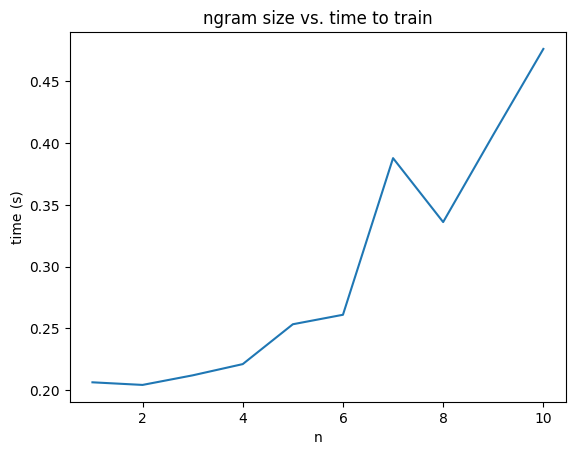

In [9]:
plt.plot(range(1, 11), times)
plt.title('ngram size vs. time to train')
plt.xlabel('n')
plt.ylabel('time (s)')
plt.show()

Overall (5 points)
---

5 points in this assignment are reserved for overall style (both for writing and for code submitted). 

All work submitted should be clear, easily interpretable, and checked for spelling, etc. (Re-read what you write and make sure it makes sense). Course staff are always happy to give grammatical help (but we won't pre-grade the content of your answers).

All code should use variables with sensible names, have comments as appropriate, be well-structured, and should not contain large blocks of uncommented code that you would not be able to easily explain one month from today.